# В этом задании вам предлагается проанализировать данные одной из американских телекоммуникационных компаний о пользователях, которые потенциально могут уйти.

In [1]:
import pandas as pd
import numpy as np

data = pd.read_csv('C:\\Users\\user\\Desktop\\churn_analysis.csv', sep=",", header=0)
print(data.columns)
print(data.head(10))

Index(['Unnamed: 0', 'state', 'account_length', 'area_code', 'intl_plan',
       'vmail_plan', 'vmail_message', 'day_mins', 'day_calls', 'day_charge',
       'eve_mins', 'eve_calls', 'eve_charge', 'night_mins', 'night_calls',
       'night_charge', 'intl_mins', 'intl_calls', 'intl_charge',
       'custserv_calls', 'treatment', 'mes_estim', 'churn'],
      dtype='object')
   Unnamed: 0 state  account_length  area_code intl_plan vmail_plan  \
0           0    KS             128        415        no        yes   
1           1    OH             107        415        no        yes   
2           2    NJ             137        415        no         no   
3           3    OH              84        408       yes         no   
4           4    OK              75        415       yes         no   
5           5    AL             118        510       yes         no   
6           6    MA             121        510        no        yes   
7           7    MO             147        415       yes  

state — штат США

account_length — длительность использования аккаунта

area_code — деление пользователей на псевдорегионы, использующееся в телекоме

intl_plan — подключена ли у пользователя услуга международного общения

vmail_plan — подключена ли у пользователя услуга голосовых сообщений

vmail_message — количество голосых сообщений, который пользователь отправил / принял

day_calls — сколько пользователь совершил дневных звонков

day_mins — сколько пользователь проговорил минут в течение дня

day_charge — сколько пользователь заплатил за свою дневную активность

eve_calls, eve_mins, eve_charge — аналогичные метрики относительно вечерней активности

night_calls, night_mins, night_charge — аналогичные метрики относительно ночной активности

intl_calls, intl_mins, intl_charge — аналогичные метрики относительно международного общения

custserv_calls — сколько раз пользователь позвонил в службу поддержки

treatment — номер стратегии, которая применялись для удержания абонентов (0, 2 = два разных типа воздействия, 1 = контрольная группа)

mes_estim — оценка интенсивности пользования интернет мессенджерами

churn — результат оттока: перестал ли абонент пользоваться услугами оператора
_____________________________________________________________________________________________________________

Давайте рассмотрим всех пользователей из контрольной группы (treatment = 1). Для таких пользователей мы хотим проверить гипотезу о том, что штат абонента не влияет на то, перестанет ли абонент пользоваться услугами оператора.

Для этого мы воспользуемся критерием хи-квадрат. Постройте таблицы сопряженности между каждой из всех 1275 возможных неупорядоченных пар штатов и значением признака churn. Для каждой такой таблицы 2x2 применить критерий хи-квадрат можно с помощью функции

Заметьте, что, например, (AZ, HI) и (HI, AZ) — это одна и та же пара. Обязательно выставьте correction=False (о том, что это значит, вы узнаете из следующих вопросов).

Сколько достигаемых уровней значимости оказались меньше, чем \alpha=0.05?
### P.S. бредовое задание. бред полный

Какие проблемы Вы видите в построении анализа из первого вопроса? Отметьте все верные утверждения.

In [55]:
contr_group_df = data[data.treatment == 1]
print(contr_group_df.info())
contr_group_df.loc[contr_group_df.churn == 'True.', 'churn'] = 0 # ушедшие клиент - 0
contr_group_df.loc[contr_group_df.churn == 'False.', 'churn'] = 1 # оставшиеся клиенты - 1
contr_group_df2 = contr_group_df.groupby('state')[['churn']].mean()
contr_group_df2['people'] = contr_group_df.groupby('state')[['churn']].count()['churn']
# получили таблицу со списком доли оставшихся людей и количества людей в i-м штате
print(contr_group_df2.head(10))


<class 'pandas.core.frame.DataFrame'>
Int64Index: 1097 entries, 0 to 3330
Data columns (total 23 columns):
Unnamed: 0        1097 non-null int64
state             1097 non-null object
account_length    1097 non-null int64
area_code         1097 non-null int64
intl_plan         1097 non-null object
vmail_plan        1097 non-null object
vmail_message     1097 non-null int64
day_mins          1097 non-null float64
day_calls         1097 non-null int64
day_charge        1097 non-null float64
eve_mins          1097 non-null float64
eve_calls         1097 non-null int64
eve_charge        1097 non-null float64
night_mins        1097 non-null float64
night_calls       1097 non-null int64
night_charge      1097 non-null float64
intl_mins         1097 non-null float64
intl_calls        1097 non-null int64
intl_charge       1097 non-null float64
custserv_calls    1097 non-null int64
treatment         1097 non-null int64
mes_estim         1097 non-null float64
churn             1097 non-null obje

C:\Users\user\Anaconda3\lib\site-packages\pandas\core\indexing.py:543: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item] = s


In [56]:
people_matrix = contr_group_df2.to_records() # matrix n*3
print(people_matrix)
people_matrix = sorted(people_matrix, key=lambda x: x[0])
print(len(people_matrix))

[('AK', 0.95      , 20) ('AL', 0.83333333, 30) ('AR', 0.6875    , 16)
 ('AZ', 0.89473684, 19) ('CA', 0.66666667, 15) ('CO', 0.77272727, 22)
 ('CT', 0.83333333, 30) ('DC', 0.94736842, 19) ('DE', 0.94117647, 17)
 ('FL', 0.9       , 20) ('GA', 0.9047619 , 21) ('HI', 0.92307692, 13)
 ('IA', 0.86666667, 15) ('ID', 0.88888889, 18) ('IL', 0.91666667, 12)
 ('IN', 0.86956522, 23) ('KS', 0.72      , 25) ('KY', 0.84      , 25)
 ('LA', 1.        , 15) ('MA', 0.70833333, 24) ('MD', 0.79166667, 24)
 ('ME', 0.71428571, 28) ('MI', 0.77272727, 22) ('MN', 0.9047619 , 21)
 ('MO', 0.80952381, 21) ('MS', 0.83333333, 24) ('MT', 0.84615385, 26)
 ('NC', 0.84210526, 19) ('ND', 0.875     , 24) ('NE', 0.875     , 24)
 ('NH', 0.83333333, 12) ('NJ', 0.83333333, 24) ('NM', 0.93103448, 29)
 ('NV', 0.75      , 24) ('NY', 0.81818182, 33) ('OH', 0.91666667, 24)
 ('OK', 0.84615385, 13) ('OR', 0.85714286, 21) ('PA', 0.77777778, 18)
 ('RI', 0.81818182, 22) ('SC', 0.76190476, 21) ('SD', 0.86956522, 23)
 ('TN', 0.91666667, 

In [57]:
from  itertools import combinations
c = list(combinations(people_matrix, 2))
print(len(c))
print(c[0])

1275
(('AK', 0.95, 20), ('AL', 0.83333333, 30))


In [58]:
from scipy.stats import chi2_contingency
p_val_list = []
for i in c:
    a1 = i[0][1]*i[0][2]
    b1 = i[0][2] - a1
    a2 = i[1][1]*i[1][2]
    b2 = i[1][2] - a2
    p_val_list.append(chi2_contingency([[a1, b1], [a2,b2]], correction=False)[1])
print(len([x for x in p_val_list if x < 0.05]))    

34


In [59]:
# а теперь посчитаем количество значимых отличий с поправкой Ейтса
p_val_list2 = []
for i in c:
    a1 = i[0][1]*i[0][2]
    b1 = i[0][2] - a1
    a2 = i[1][1]*i[1][2]
    b2 = i[1][2] - a2
    p_val_list2.append(chi2_contingency([[a1, b1], [a2,b2]], correction=True)[1])
print(len([x for x in p_val_list2 if x < 0.05]))    

0


In [60]:
print(np.mean(p_val_list) - np.mean(p_val_list2))

-0.16222925833118895


In [62]:
print([x<=y for x,y in zip(p_val_list,p_val_list2)][:100])
# видно, что поправка Ейтса не всегда увеличивает уровень значимости

[True, True, True, True, True, True, False, False, True, True, False, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, False, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, False, True, True, True, True, True, True, True, True, False, False, True, True, True, True, True, True, False, True, False, True, True, False, True, True, True, True, False, True, True, True, True, False, True, True]


что если у нас мало данных, мы не хотим использовать аппроксимацию дискретного распределения непрерывным и использовать сомнительную поправку, предположения критерия xи-квадрат не выполняются, а проверить гипотезу о том, что данные принадлежат одному распределению, нужно ?

В таком случае прибегают к так называемому точному критерию Фишера. Этот критерий не использует приближений и в точности вычисляет значение достигаемого уровня значимости используя комбинаторный подход.

In [63]:
from scipy.stats import fisher_exact
p_val_list3 = []
for i in c:
    a1 = i[0][1]*i[0][2]
    b1 = i[0][2] - a1
    a2 = i[1][1]*i[1][2]
    b2 = i[1][2] - a2
    p_val_list3.append(fisher_exact([[a1, b1], [a2,b2]])[1])   
print(len([x for x in p_val_list3 if x < 0.05]))    

10


In [66]:
print(np.mean(p_val_list3) - np.mean(p_val_list2))
print(np.mean(p_val_list3) - np.mean(p_val_list))
#Точный критерий Фишера на наших данных дает значения достигаемого уровня значимости в среднем больше,
#чем xи-квадрат 
#Точный критерий Фишера на наших данных дает значения достигаемого уровня значимости в среднем меньшие,
#чем xи-квадрат с поправкой Йетса

-0.015718332203036645
0.1465109261281523


### Давайте попробуем применить полученные знания о разных видах корреляции и ее применимости на практике.

### Рассмотрим пару признаков day_calls и mes_estim. Посчитайте корреляцию Пирсона между этими признаками на всех данных, ее значимость.

так. надо помнить, что корр пирсона имеет смысл для линейной зависимости между нормально распределенными величинами с гомоскедастичностью. В противном случае это теряет смысл.

In [12]:
data[['day_calls', 'mes_estim']].corr(method='pearson')

,day_calls,mes_estim
day_calls,1.000000,-0.051794
mes_estim,-0.051794,1.000000


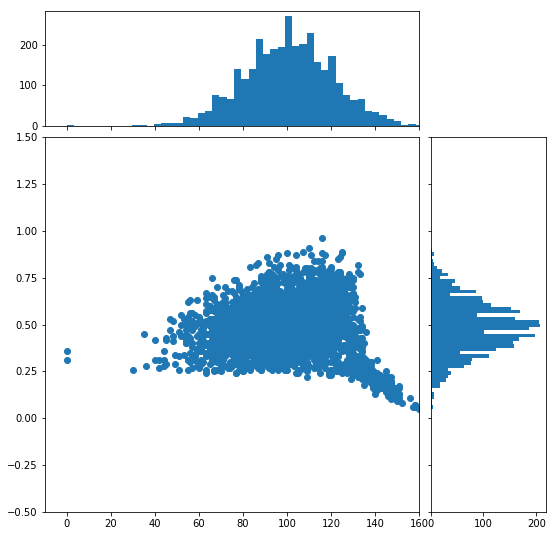

In [16]:
# надо убедиться, что нет выбросов. построим картинку
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.ticker import NullFormatter
%matplotlib inline

x = data['day_calls'].values
y = data['mes_estim'].values

nullfmt = NullFormatter()         # no labels

# definitions for the axes
left, width = 0.1, 0.65
bottom, height = 0.1, 0.65
bottom_h = left_h = left + width + 0.02

rect_scatter = [left, bottom, width, height]
rect_histx = [left, bottom_h, width, 0.2]
rect_histy = [left_h, bottom, 0.2, height]

# start with a rectangular Figure
plt.figure(1, figsize=(8, 8))

axScatter = plt.axes(rect_scatter)
axHistx = plt.axes(rect_histx)
axHisty = plt.axes(rect_histy)

# no labels
axHistx.xaxis.set_major_formatter(nullfmt)
axHisty.yaxis.set_major_formatter(nullfmt)

# the scatter plot:
axScatter.scatter(x, y)

# # now determine nice limits by hand:
# binwidth = 0.1
# xymax = np.max([np.max(np.fabs(x)), np.max(np.fabs(y))])
# lim = (int(xymax/binwidth) + 1) * binwidth

axScatter.set_xlim((-10, 160))
axScatter.set_ylim((-0.5, 1.5))

bins = np.arange(-lim, lim + binwidth, binwidth)
axHistx.hist(x, bins=50)
axHisty.hist(y, bins=50, orientation='horizontal')

axHistx.set_xlim(axScatter.get_xlim())
axHisty.set_ylim(axScatter.get_ylim())

plt.show()

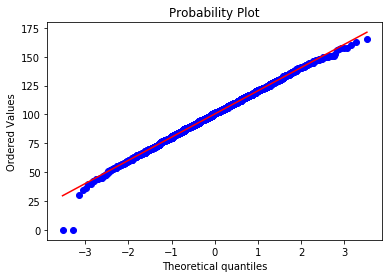

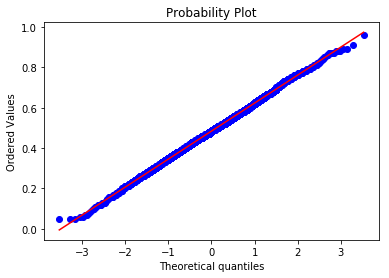

In [18]:
import scipy.stats as stats
import pylab

%matplotlib inline
stats.probplot(data['day_calls'].values, dist="norm", plot=pylab)
pylab.show()

stats.probplot(data['mes_estim'].values, dist="norm", plot=pylab)
pylab.show()

In [26]:
# гетероскедастичность
import statsmodels.formula.api as smf
import statsmodels.stats.api as sms

m1 = smf.ols('day_calls ~ mes_estim',  data=data)
fitted = m1.fit()

print ('Breusch-Pagan test: p=%f' % sms.het_breushpagan(fitted.resid, fitted.model.exog)[1])

Breusch-Pagan test: p=0.000000


C:\Users\user\Anaconda3\lib\site-packages\ipykernel_launcher.py:8: DeprecationWarning: `het_breushpagan` is deprecated, use `het_breuschpagan` instead!
Use het_breuschpagan, het_breushpagan will be removed in 0.9 
(Note: misspelling missing 'c')
  


In [14]:
# ошибки гетероскедастичны, но все равно посчитаем дов интервал
import numpy as np
from scipy import stats

def pearsonr_ci(x,y,alpha=0.05, type_cor = 'pearson'):
    ''' calculate Pearson correlation along with the confidence interval using scipy and numpy
    Parameters
    ----------
    x, y : iterable object such as a list or np.array
      Input for correlation calculation
    alpha : float
      Significance level. 0.05 by default
      type_cor = 'pearson', 'spearman'  pearson by default
    Returns
    -------
    r : float
      Pearson's correlation coefficient
    pval : float
      The corresponding p value
    lo, hi : float
      The lower and upper bound of confidence intervals
    '''
    if type_cor == 'pearson':
        r, p = stats.pearsonr(x,y)
        print(r,p)
    elif type_cor == 'spearman':
        r, p = stats.spearmanr(x,y)
        print(r,p)
    r_z = np.arctanh(r)
    se = 1/np.sqrt(x.size-3)
    z = stats.norm.ppf(1-alpha/2)
    lo_z, hi_z = r_z-z*se, r_z+z*se
    lo, hi = np.tanh((lo_z, hi_z))
    return r, p, lo, hi

pearsonr_ci(data['day_calls'].values, data['mes_estim'].values, alpha=0.05, type_cor = 'spearman')

0.043349880533927444 0.012317367189170541


(0.043349880533927444,
 0.012317367189170541,
 0.009412229225850447,
 0.0771877802164584)

### Посчитайте значение коэффицента корреляции Крамера между двумя признаками: штатом (state) и оттоком пользователей (churn) для всех пользователей, которые находились в контрольной группе (treatment=1). Что можно сказать о достигаемом уровне значимости при проверке гипотезы о равенство нулю этого коэффициента?

### P.S. бредовое задание. бред полный

In [34]:
from scipy.stats import chi2_contingency
import pandas as pd

contr_group_df = data[data.treatment == 1]
def cramers_v(x, y):
    confusion_matrix = pd.crosstab(x,y)
    chi2 = chi2_contingency(confusion_matrix)[0]
    n = confusion_matrix.sum().sum()
    phi2 = chi2/n
    r,k = confusion_matrix.shape
    phi2corr = max(0, phi2-((k-1)*(r-1))/(n-1))
    rcorr = r-((r-1)**2)/(n-1)
    kcorr = k-((k-1)**2)/(n-1)
    return np.sqrt(phi2corr/min((kcorr-1),(rcorr-1)))

cramers_v(data['state'].values, data['churn'].values)

0.09956204952446517

### В этой части задания вам нужно будет самостоятельно решить, с помощью каких методов можно провести анализ эффективности удержания (churn) с помощью раличных методов (treatment = 0, treatment = 2) относительно контрольной группы пользователей (treatment = 1).

### Что можно сказать об этих двух методах (treatment = 0, treatment = 2)? Одинаковы ли они с точки зрения эффективности? Каким бы методом вы бы посоветовали воспользоваться компании?

### Не забудьте про поправку на множественную проверку! И не пользуйтесь односторонними альтернативами, поскольку вы не знаете, к каким действительно последствиям приводят тестируемые методы (treatment = 0, treatment = 2) !

In [2]:
data2 = data.copy()
data2.loc[data.churn == 'True.', 'churn'] = 0 # ушедшие клиент - 0
data2.loc[data.churn == 'False.', 'churn'] = 1 # оставшиеся клиенты - 1

contr_group_df = data2[data2.treatment == 1]
contr_group = contr_group_df['churn'].values.tolist()
strategy1_df = data2[data2.treatment == 0]
strategy1 = strategy1_df['churn'].values.tolist()
strategy2_df = data2[data2.treatment == 2]
strategy2 = strategy2_df['churn'].values.tolist()

In [3]:
# у меня всего 3 гипотезы. для поправки на множественное сравнение сойдет поправка бонферони. 
# Поэтому для каждой проверки будем брать 0,0167 и двустороннюю гипотезу
from scipy.stats import chi2_contingency

print('стратегия 0 & котроль 1', chi2_contingency([[sum(contr_group), len(contr_group) - sum(contr_group)],
                 [sum(strategy1), len(strategy1) - sum(strategy1)]])[1])
print('----------------------------------------------------------------------')
print('стратегия 2 & котроль 1', chi2_contingency([[sum(contr_group), len(contr_group) - sum(contr_group)],
                 [sum(strategy2), len(strategy2) - sum(strategy2)]])[1])
print('----------------------------------------------------------------------')
print('стратегия 2 & стратегия 0', chi2_contingency([[sum(strategy1), len(strategy1) - sum(strategy1)],
                 [sum(strategy2), len(strategy2) - sum(strategy2)]])[1])

стратегия 0 & котроль 1 0.2517524983193889
----------------------------------------------------------------------
стратегия 2 & котроль 1 0.011135281386020091
----------------------------------------------------------------------
стратегия 2 & стратегия 0 0.17528809842137202


In [5]:
print('доля оставшихся клиентов в стратегии 0. 2. и 1', np.mean(strategy1), np.mean(strategy2), np.mean(contr_group))

доля оставшихся клиентов в стратегии 0. 2. и 1 0.8543689320388349 0.8748866727107888 0.8359161349134002
